# EDA


### Import libraries and load data


In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.multioutput import MultiOutputClassifier
# # from sklearn.base import BaseEstimator, TransformerMixin

# import re
# import nltk
# nltk.download(['punkt', 'wordnet', 'stopwords', 'averaged_perceptron_tagger', 'maxent_ne_chunker', 'words'])
# from nltk.corpus import stopwords
# from nltk import pos_tag, ne_chunk
# from nltk.tokenize import word_tokenize
# from nltk.stem.wordnet import WordNetLemmatizer

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); color='rebeccapurple'
%matplotlib inline  

# display settings
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_columns', None)  

In [2]:
# load data from database with `read_sql_table`
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('messages', engine)

## Have a look at data structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25992 entries, 0 to 25991
Data columns (total 39 columns):
id                        25992 non-null int64
message                   25992 non-null object
original                  10021 non-null object
genre                     25992 non-null object
related                   25992 non-null int64
request                   25992 non-null int64
offer                     25992 non-null int64
aid_related               25992 non-null int64
medical_help              25992 non-null int64
medical_products          25992 non-null int64
search_and_rescue         25992 non-null int64
security                  25992 non-null int64
military                  25992 non-null int64
water                     25992 non-null int64
food                      25992 non-null int64
shelter                   25992 non-null int64
clothing                  25992 non-null int64
money                     25992 non-null int64
missing_people            25992 non-null i

In [4]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Explore target class distribution

For a stratified split into test and training sets, the target class distribution has to be known and understood

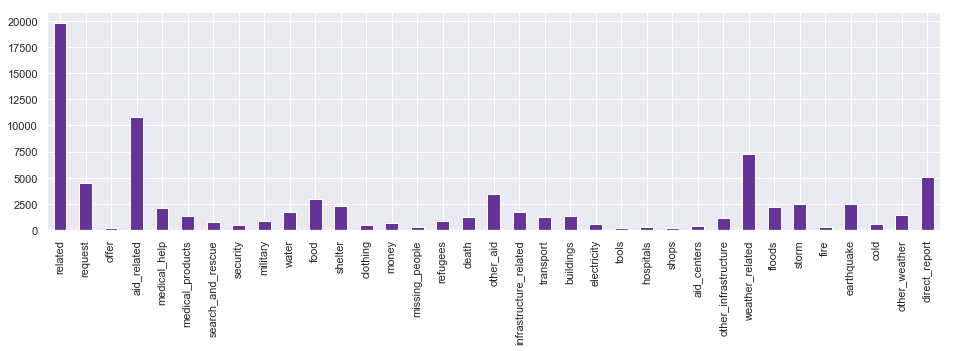

In [5]:
# check for general target class distribution
plt.figure(figsize=(16,4))
df.iloc[:,4:40].sum().plot.bar(color=color);

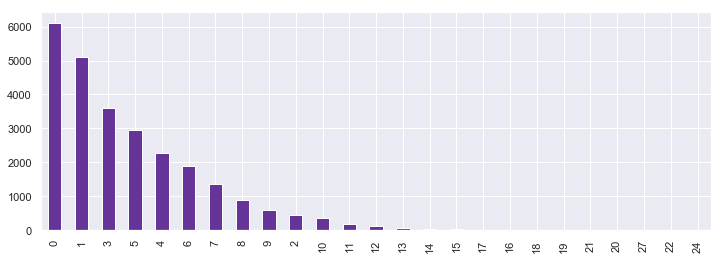

In [6]:
# check for distribution of different numbers of target categories per message

# create new column with total of active categories per message
df['total'] = df.iloc[:,4:40].sum(axis=1)
# plot the result
plt.figure(figsize=(12,4))
df['total'].value_counts().plot.bar(color=color);

In [7]:
# check for most frequent category counts per message
df['total'].value_counts().head()

0    6116
1    5115
3    3603
5    2950
4    2273
Name: total, dtype: int64

In [8]:
# check a sample of messages with 0 active categories
df.loc[(df['total'] == 0), ['message']].sample(5)

,message
6333,NOTES: This message is not important
6474,"any country wouldn't advance without education,at least close the school it's opene the door of prisons"
8888,Why does it rain every night?
25915,"Replying to a question by Congress of Democrats (CoD) leader Ben Ulenga, Simunja said legislation governing the NDF did not provide for conscientious objectors."
18563,"In Syria, rebel militias brought a detainee, ""unshackled and in flip-flops,"" into a school that had been converted to a courtroom run by seven imams to face charges of belonging to President Bashar Assad's shabiha paramilitaries and informing on antigovernment activists, according to an August 2012 account in the Los Angeles Times."


In [9]:
# check a sample of messages with 1 active categories
df.loc[(df['total'] == 1), ['message']].sample(5)

,message
25507,(d) The resourcing situation remains unchanged.
2235,im without a mother nor father.
23804,"Dirty water, sick animals used for food and other unhealthy eating conditions are causing health issues in other parts of Prey Veng too, so MCC's response includes cleaning wells, distributing hygiene kits and training teachers at Angkearhdei about hygiene and sanitation practices."
14948,"Although agricultural losses have already occurred, current problems include degraded pasture conditions and low drinking water levels, which will not be improved until at least October when short season rains normally begin to intensify."
1979,I need information about how I can leave this country


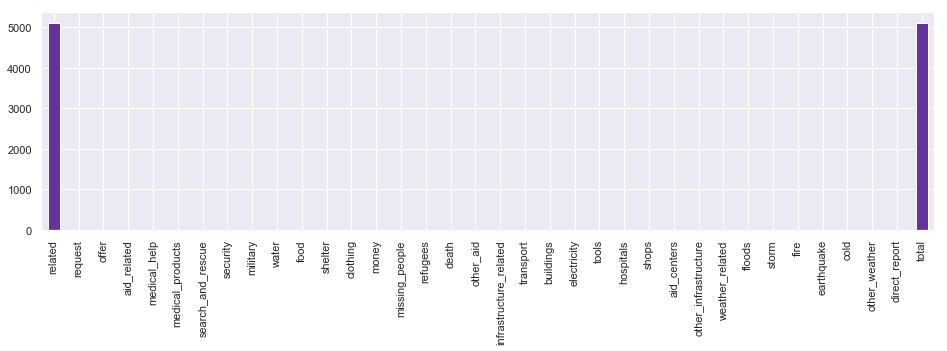

In [10]:
# check which categories are active for plots with category count of 1
df_temp1 = df.loc[(df['total'] == 1)]
# plot the result
plt.figure(figsize=(16,4))
df_temp1.iloc[:,4:40].sum().plot.bar(color=color);

__Observations__
- 6'116 messages are not distaster related (and are logically not associated to a category)
- 5'115 messages are disaster related but are not associated to a category
- 14'949 remaining messages are related and associated to 2-26 different categories each
- these seem to be grouped again into 3 main categories aid_related, infrastructure_related, weather_related
- messages with more than approx. 10 categories each are quite rare and seem to be kind of 'outliers'

__Decision__

Data will be split into test and training set with stratified sampling to preserve the distribution of number of categories in both sets. This is important to make sure that especially the proportions of non-related messages (0 active categories) and related but non-categorized messages (1 active category = 'related') will be the same in both sets.

## Split data into training and test sets (with stratified sampling)

In [11]:
# for StratifiedShuffleSlpit to work properly all values > 10 in ['total'] column will be set to 11.
df['total'] = np.where((df['total'] >10), 11, df['total'])

In [12]:
# create testset with stratified sampling according to the category count per message
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 111)
for train_index, test_index in split.split(df, df['total']):
    train = df.loc[train_index]
    test = df.loc[test_index]
    
# safety-check
assert np.abs(len(test) - (len(df) * 0.2)) <= 1, 'split got messed up'
assert (round(df['related'].sum() / len(df),3)) == (round(train['related'].sum() / len(train),3)), 'not properly stratisfied'

In [13]:
# make a copy of the train set for some further exlporation
eda = train.copy()

## Some further EDA on training set

Further exploration is performed on training only set to prevent 'data snooping bias'.

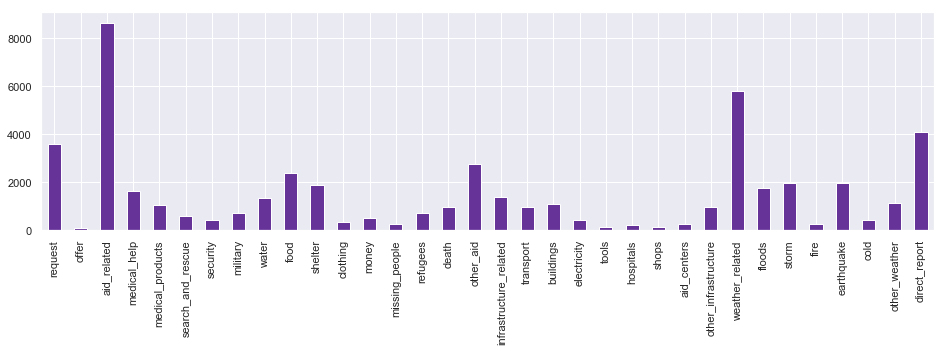

In [16]:
# distribution of the categories for related and categorized messages only (excluding category 'related')
eda_categorized = eda.loc[(eda['total'] > 1)]
# plot the result
plt.figure(figsize=(16,4))
eda.iloc[:,5:39].sum().plot.bar(color=color);

__Observation:__  Categories are imbalanced, this will have to be taken into account for model training

### Check 'outlier messages' > 10 active categories

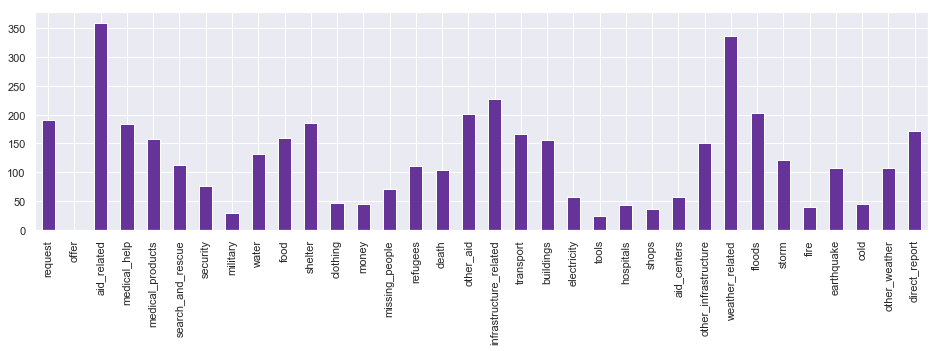

In [17]:
# check if 'outlier messages' with more than 10 categories have some special distribution
eda_outliers = eda.loc[(eda['total'] > 10)]
# plot the result
plt.figure(figsize=(16,4))
eda_outliers.iloc[:,5:39].sum().plot.bar(color=color);

In [18]:
## print number / proportion of those messages
print("Messages with > 10 active categories: {} ({}% of total)" \
      .format(len(eda_outliers), round(100*(len(eda_outliers)/len(eda)),2)))

Messages with > 10 active categories: 360 (1.73% of total)


In [19]:
# look at sample of messages with more than 20 active categories
eda.loc[(eda['total'] > 10)][['message']].sample(5)

,message
17906,"Each family was given a mat, a bed sheet, a towel, and feeding bottles if they had infants.President Mills, accompanied by ministers of state and officials from the National Disaster Management Organisation (NADMO), first stopped at the Akim Oda Zongo and Akim Jamaica, where a number of houses were partly submerged in the flood and people were taking refuge in school and church buildings."
14002,"DEDAYE, Myanmar, May 31, 2008 (AFP) - Myanmar has deployed armed riot police in one of the regions hit hardest by the cyclone, stationing them along a few kilometres (miles) of road leading to the Irrawaddy Delta."
17769,"The rain damaged some 2,000 homes, cut 15 roads and forced at least three big industrial plants to halt operations in the city."
23722,"The last information bulletin estimated that two million people were affected, and reports now suggest this figure will increase."
5364,"Good evening. We live in the St-Antoine, Mergere area. Commune of Gressier. We are refugees in our backyard. We would like to get some help but with dignity, like house by house. water and Food.. we.. (truncated)"


In [20]:
# check genre of these outliers
eda_outliers['genre'].value_counts()

news      195
direct    146
social    19 
Name: genre, dtype: int64

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


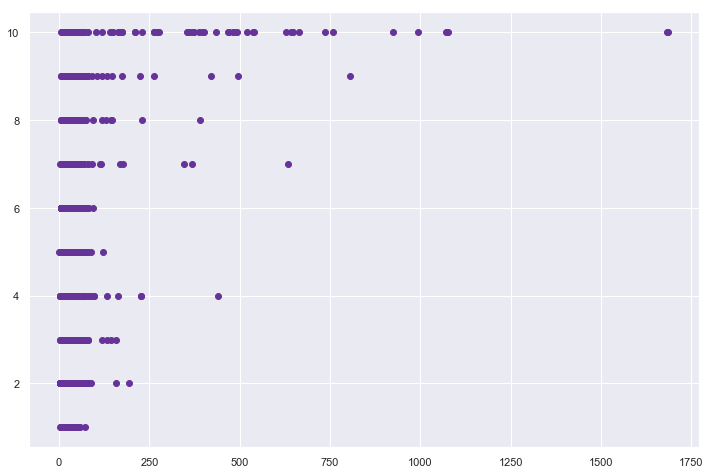

In [21]:
# check for correlation between message length (in words) and number of active categories

# generate necessary columns
eda_categorized['n_categories'] = eda_categorized['total'] -1 # remove 'related' from count
eda_categorized['message_length'] = eda_categorized['message'].apply(lambda x : len(x.split())) # get message length

# plot the results
plt.figure(figsize=(12,8))
plt.scatter(eda_categorized['message_length'], eda_categorized['n_categories'], color=color);

In [26]:
# print pearson's r for the two columns
np.corrcoef(eda_categorized['message_length'], eda_categorized['n_categories'])[0][1]

0.18245322080234158

In [27]:
# check mean length of different groups of messages
print('all messages   {:6f}'.format(eda_categorized['total'].mean()))
print('all related messages   {:6f}'.format(eda.loc[eda['related'] == 1]['total'].mean()))
print('all aid related messages   {:6f}'.format(eda.loc[eda['aid_related'] == 1]['total'].mean()))
print('all infrastructure related messages   {:6f}'.format(eda.loc[eda['infrastructure_related'] == 1]['total'].mean()))
print('all weather related messages   {:6f}'.format(eda.loc[eda['weather_related'] == 1]['total'].mean()))

all messages   5.212398
all related messages   4.128302
all aid related messages   5.828446
all infrastructure related messages   7.839711
all weather related messages   5.903770


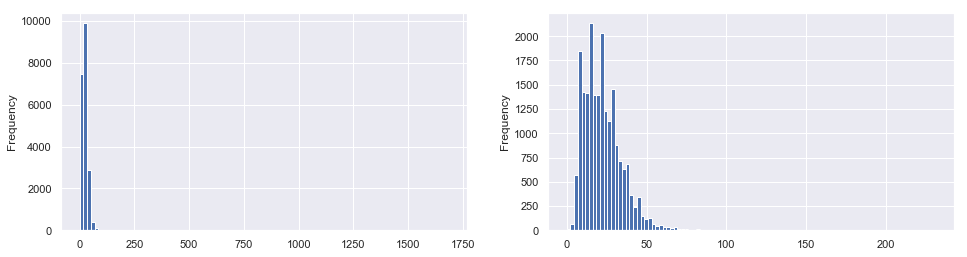

In [34]:
# check distribution of message length's (all messages)
eda['message_length'] = eda['message'].apply(lambda x : len(x.split())) # get message length
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
eda['message_length'].plot.hist(bins=100)
plt.subplot(1,2,2)
eda['message_length'].loc[eda['message_length'] <250].plot.hist(bins=100);

__Observations__: The Distribution of the 'oultier messages' is not very different from the total distribution and the correlation between message length and number of categories is positive but weak. It seems, that the long messages are mostly reports, probably by professional staff (NGOs, Journalists etc.) and not calls for help.

### Check influence of column 'genre'

In [24]:
# check proportion of related messages per genre
print('overall   {:6f}'.format(eda['related'].mean()))
eda.groupby('genre') ['related'].mean()

overall   0.773825


genre
direct    0.692370
news      0.820057
social    0.889126
Name: related, dtype: float64

In [25]:
# check mean number of categories for related messages per genre
print('overall   {:6f}'.format(eda_categorized['total'].mean()))
eda_categorized.groupby('genre') ['total'].mean()

overall   5.172004


genre
direct    5.458752
news      5.060497
social    4.778875
Name: total, dtype: float64

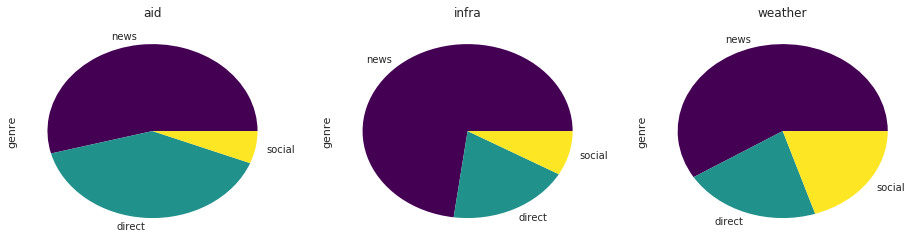

In [26]:
# check influence of main categories on genre (or vice versa)

# create dataframes for plotting
eda_aid = eda.loc[eda['aid_related'] == 1]
eda_infra = eda.loc[eda['infrastructure_related'] == 1]
eda_weather = eda.loc[eda['weather_related'] == 1]
# plot the results
plt.figure(figsize=(16,4))
i = 0
for df, label in [(eda_aid, 'aid'), (eda_infra, 'infra'), (eda_weather, 'weather')]:
    i += 1
    plt.subplot(1,3, i)
    plt.title(label)
    df['genre'].value_counts().plot.pie(cmap='viridis');

__Observations__
- There are significantly less disaster related messages in genre direct than in genres news and especially social
- the mean number of categories per message is around 5 for all genres, interesingly it is going down the more messages are related.
- The proportions of the different genres differ within the main categories.

__Conclusion / Decision:__ 
- The information in `genre` could most probably help to train a classifier, but for the purpose of this project (web app to classify plain text inputs) it won't help, so it will be dropped.
- Further the `id` and `original`columns will be dropped too.